In [32]:
%load_ext ipydex.displaytools
%matplotlib inline

The ipydex.displaytools extension is already loaded. To reload it, use:
  %reload_ext ipydex.displaytools


Gegeben:

![](circuit.png)



Gesucht:

- a) Wert $R_2^*$ so, dass bei $R_2 = R_2^*$ bei offenem und geschlossenem Schalter der gleiche Effektivwert des Stromes fließt.
- b) Ortskurven-Schar $|Z (\omega, R_2)|$

## b) Ortskurven-Schar $|Z (\omega, R_2)|$

In [9]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

omega, R1, R2, C = sp.symbols("omega, R1, R2, C", real=True)

Zc = 1/(1j*omega*C) ##:

Z = R1 + (R2*Zc)/(R2 + Zc) ##:

Zc := -1.0*I/(C*omega)

---

Z := R1 - 1.0*I*R2/(C*omega*(R2 - 1.0*I/(C*omega)))

---

In [66]:
rplmts = [(R1, 1e3), (C, 0.22e-6)]

R2_star = 1/(2*R1*omega**2*C**2).subs(rplmts).subs(omega, 400).evalf() ##:

Z_num = Z.subs(rplmts) ##:
Z_func = sp.lambdify((omega, R2), Z_num, modules="numpy")

R2_star := 64566.1157024793

---

Z_num := -4545454.54545454*I*R2/(omega*(R2 - 4545454.54545454*I/omega)) + 1000.0

---

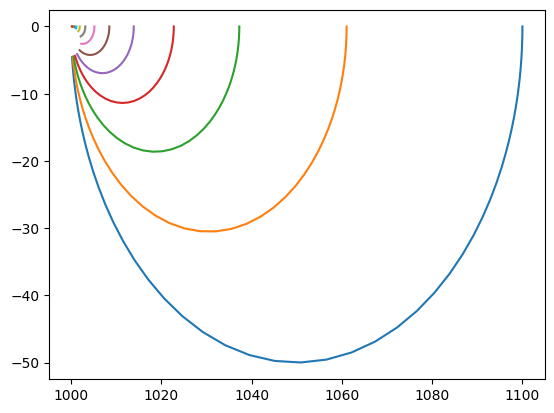

In [63]:
rr = np.logspace(-1, 2, 15)[::-1]
ww = np.logspace(-1, 6, 141)


for r2 in rr:
    zz = Z_func(ww, r2)
    plt.plot(np.real(zz), np.imag(zz))


radius := 11407.66463313328

---

(Z_func(float(R2_star), 400)) := (1012.0181265131292-68.28480973368917j)

---

radius := 11407.66463313328

---

(Z_func(float(R2_star), 400)) := (1012.0181265131292-68.28480973368917j)

---

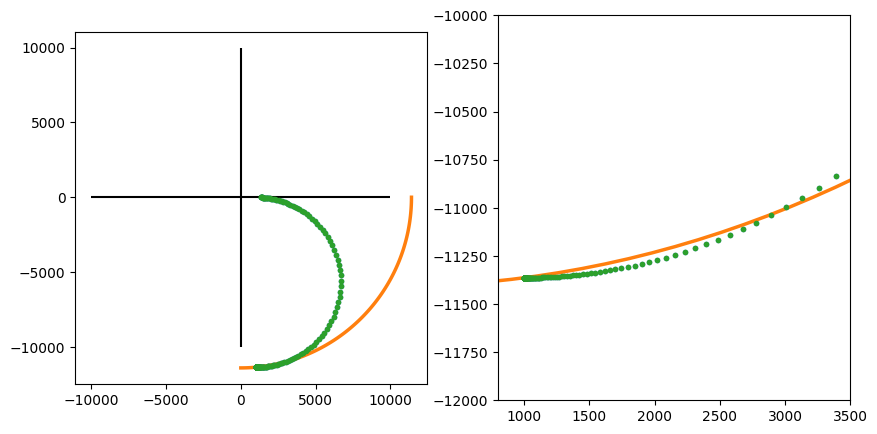

In [68]:

#%matplotlib qt
%matplotlib inline


def plot(ax, axis=None):
    zz = Z_func(400, np.logspace(2.5, 8, 200))
    ax.plot(np.real(zz), np.imag(zz), ".")

    # Achsenkreuz
    k = 1e4; ax.vlines([0], -k, k, "k"); ax.hlines([0], -k, k, "k")

    # Viertelkreis:
    
    radius = np.abs(zz[-1]) ##:
    ttheta = np.linspace(0, -np.pi/2, 100)
    ax.plot(radius * np.cos(ttheta), radius * np.sin(ttheta), linewidth=2.5)  # Draw the arc

    Z_func(float(R2_star), 400) ##:
    ax.plot(np.real(zz), np.imag(zz), ".")

    if axis is None:
        ax.set_aspect('equal')
    else:
        ax.axis(axis)
        
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plot(ax1)
plot(ax2, axis=[800, 3500, -1.2e4, -1e4])
